# Classification: Customer Churn Prediction

A predictive model will be developed to classify whether a customer will churn (stop using the service) or not. Early detection of customers at risk of churn is crucial for companies to maintain customer loyalty and design effective retention strategies. A logistic regression model will be used for this classification.

# Load Data

Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

Load data

In [2]:
df_load = pd.read_csv("C:/Users/LENOVO/Python/dqlab_telco_final.csv")
print(df_load.shape)

(6950, 13)


Show data

In [3]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


Know the number of customers from unique id

In [4]:
df_load.customerID.nunique()

6950

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the initial stage in the data analysis process, aimed at understanding the content, patterns, and characteristics of the data used. This process includes analyzing distribution, frequency, correlation, and relationships between variables.

Generally, EDA can be conducted using three approaches:
* Univariate Analysis: Descriptive analysis of a single variable, either numeric or categorical. For example, examining the distribution of values, central tendency (mean, median), and data distribution.
* Bivariate Analysis: Analysis of the relationship between two variables, typically between a feature and a target variable (for example, between subscription length and churn status).
* Multivariate Analysis: Analysis of the relationship between more than two variables simultaneously to identify more complex patterns.

In this exploration, analysis was conducted separately for numerical features and categorical features, with a particular focus on the distribution of data between customers who churned and those who did not (churn: yes and churn: no).

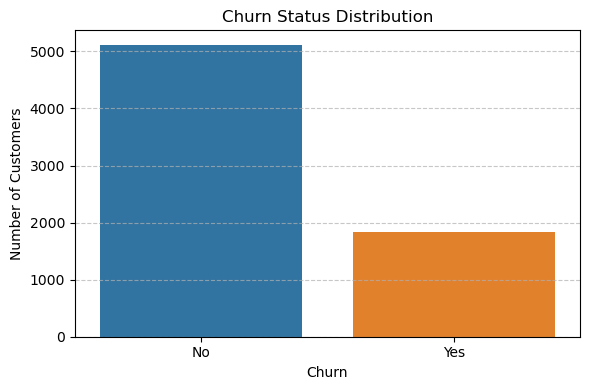

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_load, x='Churn', hue='Churn')
plt.title('Churn Status Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the bar chart results, it can be seen that the majority of customers did not experience churn, with the number of Churn = No customers exceeding 5000, while Churn = Yes was less than 2000.

## Exploratory Data Analysis (EDA) Numerical Variables
In this stage, we will focus on the numerical variables that act as predictors. The analysis is conducted bivariately, visualizing the relationship between each numerical variable and the target variable (churn).

We will use the df_load dataset and the subplots() function to display multiple graphs in a single view for a more structured and easily comparable analysis.

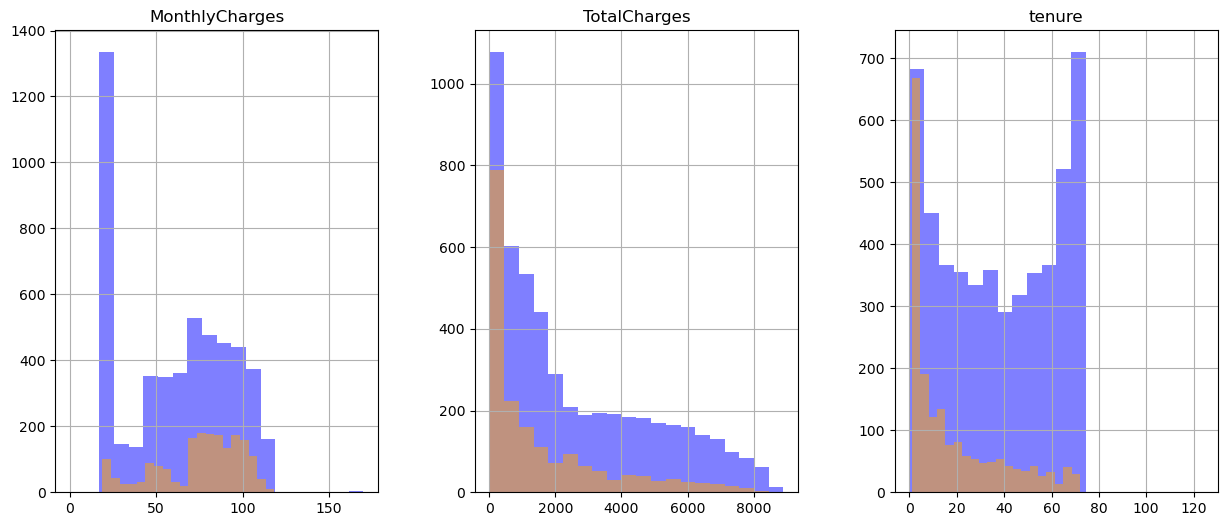

In [6]:
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two histogram layers per each numeric feature, using blue and orange colors, respectively.
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

The results above can be interpreted as follows:
1. MonthlyCharges
    * Customers with a "Yes" churn (orange) tend to have more churn at high MonthlyCharges levels (around 70 and above) than customers with a "No" churn (blue).
    * Conversely, at MonthlyCharges levels (around 20-40), non-churn customers dominate.
    * Therefore, customers with higher monthly bills are at higher risk of churn.
2. TotalCharges
    * Most "Yes" churn customers have low TotalCharges (below 2000).
    * Customers with high TotalCharges (above 5000) mostly do not churn.
    * Therefore, newly joined customers (low TotalCharges → short subscription period) tend to be more susceptible to churn.
3. Tenure
    * Customers with a "Yes" churn predominate at low tenure levels (less than 20 months).
    * Conversely, customers with long tenures (over 60 months) almost entirely do not churn.
    * So, the longer a customer stays, the less likely they are to churn.

## Exploratory Data Analysis (EDA) of Categorical Variables
Next, we will analyze the categorical variables that act as predictors. As before, a bivariate analysis will be conducted on target churn to observe distribution patterns within each category.

The visualization will be created using Seaborn's countplot() function to display the number of observations (count) in each category, differentiated by churn status.

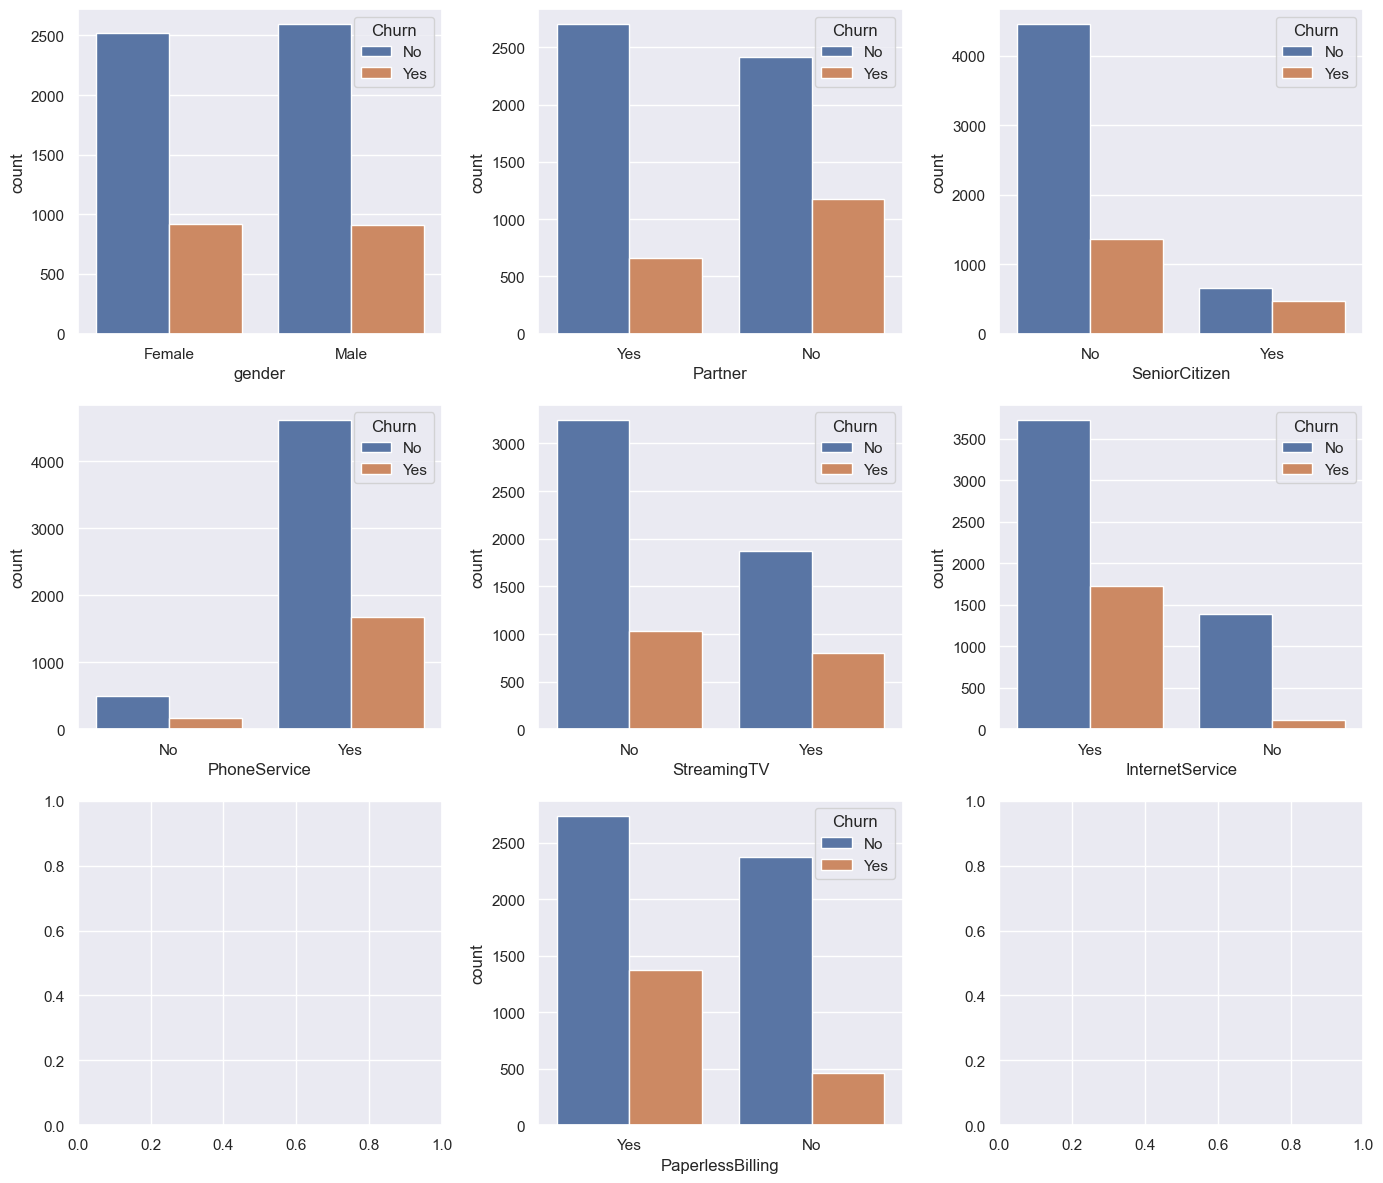

In [7]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

Here are some EDA analysis results for categorical variables:
1. Gender
    * There is no significant difference between men and women: churn occurs almost equally in both genders.
    * Therefore, gender is not a significant factor in churn.
2. Partner
    * Customers without a partner (Partner = No) churn more often than those with a partner.
    * Therefore, having a partner appears to increase customer loyalty.

3. Senior Citizen
    * Seniors (Senior Citizen = Yes) churn more often than non-seniors.
    * Therefore, older customers tend to be more prone to churn.
4. Phone Service
    * The majority of customers have phone service, and churn is more common in this group.
    * However, due to the skewed distribution (the majority do have phone service), this information needs to be related to the proportion of churn compared to the total number of customers in each category.
5. Streaming TV
    * Customers without Streaming TV service churn more often than those with one.
    * Therefore, entertainment features such as streaming can help reduce churn.
6. Internet Service
    * Customers with Internet Service = Yes have higher churn rates.
    * Therefore, internet access carries a higher risk of churn, possibly due to more provider/competitor options.
7. Paperless Billing
    * Customers with Paperless Billing = Yes have higher churn rates.
    * Therefore, e-billing users may be more tech-savvy → easier to compare and switch providers.

# Preprocessing Data

## Removing Unnecessary Columns from data

In [8]:
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
print(cleaned_df.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


Converting a non-numeric column to a numeric column

In [9]:
for column in cleaned_df.columns:
    if np.issubdtype(cleaned_df[column].dtype, np.number):
        continue
    # Perform coding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

print(cleaned_df.describe())


            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.423165      0.903741   
std       0.500017       0.368754     0.499757    24.581073      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000   124.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [10]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,29.85,29.85,0
1,1,0,1,60,1,0,0,1,20.50,1198.80,0
2,1,0,0,5,1,1,1,0,104.10,541.90,1
3,0,0,1,72,1,1,1,1,115.50,8312.75,0
4,0,0,1,56,1,1,1,0,81.25,4620.40,0


# Split Dataset

Use the previously cleaned dataset (cleaned_df) to split the data into two parts: 70% for training and 30% for testing, based on the predictor (X) and target (Y) variables. Use the train_test_split() function from sklearn.model_selection to perform this data split.

After the data split, perform value_counts() on the target in the training and test data to ensure the class distribution (churn proportion) remains balanced (stratified). Store the split results in the variables X_train, X_test, y_train, and y_test.

In [11]:
# Predictor and target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

# Split train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('The number of rows and columns of x_train is:', x_train.shape,', while the number of rows and columns of y_train is:', y_train.shape)
print('The percentage of churn in the training data is:')
print(y_train.value_counts(normalize=True))
print('The number of rows and columns of x_test is:', x_test.shape,', while the number of rows and columns of y_test is:', y_test.shape)
print('Percentage Churn in the Testing data is:')
print(y_test.value_counts(normalize=True))

The number of rows and columns of x_train is: (4865, 10) , while the number of rows and columns of y_train is: (4865,)
The percentage of churn in the training data is:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
The number of rows and columns of x_test is: (2085, 10) , while the number of rows and columns of y_test is: (2085,)
Percentage Churn in the Testing data is:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


# Model Building and Prediction

In [12]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
log_model = LogisticRegression(max_iter=500).fit(x_train_scaled,y_train)
log_model

LogisticRegression(max_iter=500)

Perform training and testing predictions

In [14]:
y_train_pred = log_model.predict(x_train_scaled)
y_test_pred = log_model.predict(x_test_scaled)

# Evaluation of Results

Displaying the classification report

In [15]:
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.66      0.49      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.75      0.70      0.72      4865
weighted avg       0.79      0.80      0.79      4865



## Training Model Results
1. Class 0 (No Churn)
    * Precision 0.83 → Of all "no churn" predictions, 83% were correct.
    * Recall 0.91 → Of all customers who actually did not churn, 91% were recognized.
    * F1-score 0.87 → Fairly good harmonization of precision and recall.
2. Class 1 (Churn)
    * Precision 0.66 → Of all "churn" predictions, only 66% actually churn.
    * Recall 0.49 → Of all customers who actually churned, only 49% were detected by the model.
    * F1-score 0.56 → Fairly low, indicating difficulty detecting churn.
3. Overall training accuracy: 0.80 → The model correctly recognized 80% of the customers in the training data.
4. Macro average: F1-score 0.72 → average performance between classes with the same weight (it appears that class 1 is still weak).

In [16]:
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.63      0.47      0.54       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.70      2085
weighted avg       0.78      0.79      0.78      2085



## Testing Model Results
1. Class 0 (No Churn)
    * Precision 0.83, Recall 0.90, F1-score 0.86 → consistent with training, stable performance on non-churn customers.
2. Class 1 (Churn)
    * Precision 0.63 → still below 70%, indicating the model frequently mispredicts churn.
    * Recall 0.47 → only 47% of churned customers are detected, a significant risk to the business.
    * F1-score 0.54 → remains low as in training.
3. Overall testing accuracy: 0.79 → slightly lower than training, but indicating relatively stable model generalization.
4. Macro average: F1-score 0.70 → average performance across classes with equal weights (it appears that class 1 is still weak).

# Conclusion
* This logistic regression model is capable of detecting non-churn customers well (precision and recall above 80%).
* However, the model still performs poorly in detecting churned customers, as evidenced by the churn class recall being below 50%. This means that many churned customers are missed in predictions, potentially harming the business.
* Accuracy in testing (79%) is quite good and not far from the training accuracy, so the model is not overfitting.